### 딥러닝을 가능케한 autograd

In [1]:
import torch

In [2]:
x = torch.tensor([1.], requires_grad=True)
print(x)


tensor([1.], requires_grad=True)


In [3]:
x = torch.tensor([1.])
print(x)
print(x.requires_grad)

x.requires_grad = True
print(x)
print(x.requires_grad)

tensor([1.])
False
tensor([1.], requires_grad=True)
True


In [6]:
x = torch.tensor([2.,], requires_grad=True)
y = x**2
print(y) # PowBackward0 가 붙어 있다

print(x.grad)
y.backward()
print(x.grad) # y = x**2 를 미분한 2x 의 x 값에 1을 대입한 gradient 값

tensor([4.], grad_fn=<PowBackward0>)
None
tensor([4.])


In [17]:
x = torch.tensor([1.,], requires_grad=True)
y = x**2
print(y)  # grad_fn -> x ( requires_grad 가 True 인 ) 에 대해서 어떤 연산을 했는지 표현
          # 가장 마지막 연산만 나타냄 ( 실제로는 모든 연산이 들어가있음 )
          # 현재는 제곱 연산을 했으니까 Power 가 들어가있음

y.retain_grad()

z = 3*y
print(z) # 여기서느 grad_fn 이 Multiplication 인걸 확인 가능

z.backward()
print(x.grad) # chain rule 로 알아냄
print(y.grad) # error 발생. leaf-Tensor ( requeires_grad 가 Ture 인 Tensor  ) 가 아니라 error 가 발생한다고 나옴
              # y.retain_grad() 를 사용하면 y.grad 가능




tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])
tensor([3.])


In [19]:
x = torch.tensor([1.,], requires_grad=True)
y = x**2
z = 3*y

y.backward() # 중간 거부터 미분 가능 , 꼭 뿌리부터 해야되는거 아님
print(x.grad)

tensor([2.])


In [21]:
x = torch.tensor([1.,], requires_grad=True)
a = x**2
b = a+1
print(b) # AddBackward0 가 붙어있다
c = b**2
c.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([8.])


In [23]:
x = torch.tensor([1.,], requires_grad=True)
y = torch.tensor([1.,], requires_grad=True)
z = 2*x**2 + y**2
z.backward()
print(x.grad)
print(y.grad)



tensor([4.])
tensor([2.])


In [25]:
x = torch.tensor([1.,2.,3.], requires_grad=True)
y=torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad)

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [28]:
x = torch.tensor([1.], requires_grad=True)
x.requires_grad = False #trasfer learning 할 때 사용
y = x**2
print(y)
#y.backward() # error

tensor([1.])


In [30]:
x = torch.tensor([2.,], requires_grad=True)
x2 = x.detach() # detach 는 requires_grad = False 인 새로운 텐서를 만드는 것
print(x)
print(x2)
y=x**2
print(y)
y2=x2**2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


**detach 사용 용도**

In [31]:
x = torch.tensor([1.,], requires_grad=True)
y = x**2
z = y.detach() # x로 만든 것을 상수로 사용 하고 싶을 때 사용
               # 중간에 y.requires_grad = False 같은걸 못하기 떄문에 사용
w=y+z # x**2+1 과 같다
w.backward()
print(x.grad)

tensor([2.])


**많이 사용되는 torch.no_grad**

In [35]:
x = torch.tensor([1.], requires_grad=True)
# chain rule을 위해 계속 grad_fn 을 update 하니까 grad_fn 을 잠시 계산하고 싶지 않을 때 torch.no_grad 사용
# 모델 테스트 시에는 불필요하게 메모리 쓸 필요 없기 때문!
with torch.no_grad():
    y = x**2
    print(x.requires_grad)
    print(y) # with 안에서 계산되는 애들은 grad_fn 이 붙지 않음
print(x.requires_grad)
#y.backward() # error
y=x**2
print(y)

x = torch.tensor([1.,], requires_grad=True)
x.requires_grad = False
y = x**2
print(x.requires_grad)
print(y)
#y.backward() # error

True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


In [36]:
#!pip install torchviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.4 MB/s eta 0:00:00
  Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.


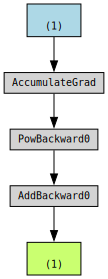

In [42]:
from torchviz import make_dot

x = torch.tensor([1.,], requires_grad=True)
make_dot(x**2+1)